# Sync Intern's
## Name: Rushikesh Bhalerao
## Task 2: Boston House Price Prediction 

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Cleaning & preprocessing the dataset

In [4]:
df= pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
df.shape

(506, 13)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Checking for the Null values

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Set the target

In [10]:
df['price']=boston.target

In [11]:
X = df.drop(['price'], axis = 1)
y = df['price']

### Dividing the dataset into Training & Testing Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [18]:
print(X_train)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE      DIS   RAD    TAX  \
214   0.28955   0.0  10.59   0.0  0.489  5.412    9.8   3.5875   4.0  277.0   
366   3.69695   0.0  18.10   0.0  0.718  4.963   91.4   1.7523  24.0  666.0   
290   0.03502  80.0   4.95   0.0  0.411  6.861   27.9   5.1167   4.0  245.0   
355   0.10659  80.0   1.91   0.0  0.413  5.936   19.5  10.5857   4.0  334.0   
258   0.66351  20.0   3.97   0.0  0.647  7.333  100.0   1.8946   5.0  264.0   
..        ...   ...    ...   ...    ...    ...    ...      ...   ...    ...   
398  38.35180   0.0  18.10   0.0  0.693  5.453  100.0   1.4896  24.0  666.0   
167   1.80028   0.0  19.58   0.0  0.605  5.877   79.2   2.4259   5.0  403.0   
230   0.53700   0.0   6.20   0.0  0.504  5.981   68.1   3.6715   8.0  307.0   
237   0.51183   0.0   6.20   0.0  0.507  7.358   71.6   4.1480   8.0  307.0   
248   0.16439  22.0   5.86   0.0  0.431  6.433   49.1   7.8265   7.0  330.0   

     PTRATIO       B  LSTAT  
214     18.6  348.93 

In [19]:
print(X_test)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
22    1.23247   0.0   8.14   0.0  0.538  6.142  91.7  3.9769   4.0  307.0   
321   0.18159   0.0   7.38   0.0  0.493  6.376  54.3  4.5404   5.0  287.0   
0     0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900   1.0  296.0   
135   0.55778   0.0  21.89   0.0  0.624  6.335  98.2  2.1107   4.0  437.0   
385  16.81180   0.0  18.10   0.0  0.700  5.277  98.1  1.4261  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
191   0.06911  45.0   3.44   0.0  0.437  6.739  30.8  6.4798   5.0  398.0   
84    0.05059   0.0   4.49   0.0  0.449  6.389  48.0  4.7794   3.0  247.0   
192   0.08664  45.0   3.44   0.0  0.437  7.178  26.3  6.4798   5.0  398.0   
348   0.01501  80.0   2.01   0.0  0.435  6.635  29.7  8.3440   4.0  280.0   
219   0.11425   0.0  13.89   1.0  0.550  6.373  92.4  3.3633   5.0  276.0   

     PTRATIO       B  LSTAT  
22      21.0  396.90  18.72  
321     19.6  3

### Building our model

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
y_pred = reg.predict(X_train)

### Evaluating the model

In [15]:
print("Mean Absolute Error    =",mean_absolute_error(y_pred,y_train))
print("Mean Squared Error     =",mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_train,y_pred)))
print("Accuracy               =",r2_score(y_train,y_pred)*100)

Mean Absolute Error    = 0.8641064356435642
Mean Squared Error     = 1.722675487623763
Root Mean Squared Error= 1.3125073285981161
Accuracy               = 97.95623541614236


## Conclusion- We have built the House prediction model that gives us 98% Accuracy.

### Data Visualization

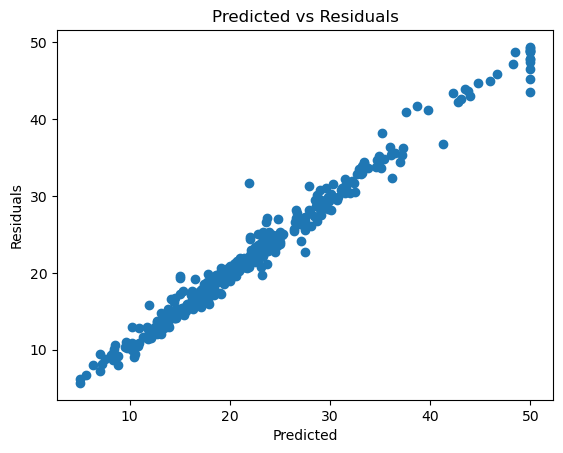

In [16]:
plt.scatter(y_train,y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

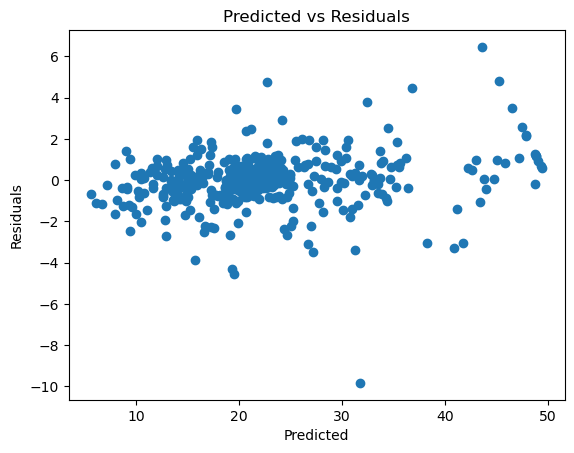

In [17]:
plt.scatter(y_pred, y_train - y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title("Predicted vs Residuals")
plt.show()